# Getting started with Jupyter notebooks

This document has two main objectives:
  * a summary and guide through the notebooks in this repository
  * a quick tutorial for Jupyter newbies.
  
The goal is to quickly get you started exploring these notebooks if you have no prior experience with Jupyter notebooks. This is not a replacement for the full [Jupyter documentation](https://jupyter.readthedocs.io/en/latest/) or its [Quick Start Guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest).

## What is a Jupyter notebook?

Notebooks are documents produced by the Jupyter Notebook App, which contain both computer code (e.g. python) and rich text elements (paragraph, equations, figures, links, etc...). Notebook documents are both human-readable documents containing the analysis description and the results (figures, tables, etc..) as well as executable documents which can be run to perform data analysis.

## How can you use the notebooks in this repository?

### Read-only from GitHub
The simplest form of fruition of a Jupyter notebook is to read it as a static page. We ran the notebooks on our systems, we saved them in a standard format, and them [uploaded them to GitHub](https://github.com/olaurino/sherpa-standalone-notebooks). GitHub is able to render such standard documents, including images and tables resulting from the analysis.

### Run them locally (macOS/Linux)
If you have a Linux or macOS system, you can install the full Sherpa/Jupyter stack and run the notebook service locally.

The easiest way is to use [Anaconda](https://www.continuum.io/downloads), or its minimalistic version [Miniconda](http://conda.pydata.org/miniconda.html). Installing them provides you with the `conda` package manager, that you can use to create self-contained, isolated environments. Create one such environment for Sherpa and Jupyter notebooks, install all the dependencies necessary to run the notebooks, download the notebooks themselves and then launch `jupyter notebook`:

~~~~
$ bash
$ conda create -n sherpa-workshop python=3.5   # note that we support also Python 2.7
$ source activate sherpa-workshop
$ conda install astropy matplotlib scipy ipython-notebook sherpa=4.8.2 -c sherpa
$ pip install saba corner
$ git clone https://github.com/olaurino/sherpa-standalone-notebooks
$ cd sherpa-standalone-notebooks
$ git checkout -b aas   # create a branch in git; save your changes as you go
$ jupyter notebook
~~~~

When you run notebooks locally, changes are persisted. You can use `git` to commit changes, push them to your GitHub fork, and if you have suggestions for improvements over current notebooks or even for new notebooks you can issue Pull Requests against our repositories.

### Run them from a cloud service

Some cloud services allow users to actually run the notebooks without having to install anything, from any device, including tablets and smartphones, as long as you can run a web browser. This means you can re-run our notebooks, edit them, create new notebooks, and even upload and use your own file or install new software.

These notebooks, however, are ephemeral. After a timeout of a few hours they are shut down and thrown away. You can save the notebooks by using the `File -> Download As` options. If you plan to run the notebooks locally you should download them in the Notebook format (`.ipynb`).

These services are currently prototypes and aimed to live demos. There is no guarantee they will be up and running regularly or that your data will be persisted.

#### Available services
  * [AAS temporary service](http://sherpa.cfa.harvard.edu). For the duration of the AAS meeting in Grapevine, TX we are hosting a temporary service for AAS users participating to our workshop.
  * The [MyBinder.org](http://mybinder.org/repo/olaurino/sherpa-standalone-notebooks) service provides live notebooks you can run yourself. We uploaded an image of the Sherpa notebooks. However, note that the service is free and it is not guaranteed any uptime. You can [check the status of the service on their status webpage](http://mybinder.org/status).
  

## Running notebooks
When you run `jupyter` in notebook mode, the first view you are presented with is the *Dashboard*. You can click on a link to a notebook and that notebook will open in a new browser window. From the *Dashboard* you can create new notebooks, duplicate or remove existing notebooks, upload files, and even launch a web terminal to install new software or run system commands from the Linux bash command line.

### Cells
A notebook is made of *cells*. Some cells contain rich text, but mostly they contain code. You can edit any code cell by clicking on it. Rich text cells can be edited by double clicking on them.

Try editing this cell by double clicking on it and adding some text above or below the existing one.

When you are done, hit `Shift+Enter` to *compute* the current cell, which for a rich text cell means rendering it as HTML.

The cell below is a Python code cell. You should see the current output as the output that was generated when the current notebook was run. Run the cell below by hitting `Shift+Enter` and the output will update to show the current date and time.

In [1]:
from datetime import datetime
print(datetime.now())
a = 5

2016-12-27 12:58:52.050941


Once a cell has been calculated, the symbols it has imported and the variables it has assigned will be available to other cells in the same notebook. For instance, the cell below prints the value of the variable `a` defined in the cell above.

In [2]:
print(a)

5


You can go back to the cell defining `a`, change its value, then re-run the cell above.

At any time, you can restart the *kernel*, i.e. the engine running the code you type in the cells. Restarting the *kernel* will reset all the cells, but the output will be still shown, unless you restart the *kernel* and clean out all the output cells as well. These options are available in the `Kernel` menu.

You can also restart the *kernel* and run all the cells. Try that now, if you want.

You can produce embedded graphical output by using `matplotlib`, as long as you have it installed as a package in your environment. If you are using one of our prototype cloud services then the package is already installed.

In order to initialize the `matplotlib` environment, run the following cell, which uses a jupyter *magic* command. Magic commands start with a `%` sign.

In [3]:
%matplotlib inline

To create your first plot you need to import the `pyplot` module. Remember you need to execute cells by hitting `Shift+Enter`.

In [4]:
from matplotlib import pyplot as plt

Now, let's plot something simple, e.g. a parabola. In the next cell we define a Python function that implements the $f(x) = x^2$ analytical function.

If you are in awe for the rendering of the mathematical expression above, double click on this cell to visualize the source code: you can use $\LaTeX$ expressions by surrounding them with $ signs.

In [5]:
def parabola(x):
    return x**2

Now, we define an array for the independent variable and, for each value, we calculate the dependent values array.

In [6]:
x = [1, 2, 3]
y = []
for i in x:
    y.append(parabola(i))

In [7]:
print(y)

[1, 4, 9]


There are more elegant ways of achieving the same results in practice, and they are also more efficient when dealing with actual data. The cell below performs the above calculations using `numpy`.

In [8]:
import numpy as np
x = np.linspace(1, 3, 3) # create 3 linearly spaced elements from 1 to 3
y = parabola(x) # The function will be applied (or broadcasted) to all elements in the x array

In [9]:
print(x, y)

[ 1.  2.  3.] [ 1.  4.  9.]


Let's create a more realistic dataset with more values and some noise

In [10]:
x = np.linspace(1, 25)
y = parabola(x)
stddev = 20
mean = 0
y = y + np.random.normal(mean, stddev, y.size)
err = np.full_like(y, stddev)

Now we can perform a very simple fit with Sherpa.

We will use the convenient `ui` module and set a polynomial model. Depending on the details of your installation you might get some Warning when importing Sherpa: they refer to optional component not present on your system and you can ignore them unless you are planning to use features related to those components.

In [11]:
from sherpa.astro import ui
ui.load_arrays(1, x, y, err)
ui.set_model("polynom1d.p1")
p1 = ui.get_model_component("p1")
print(p1)

failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find ds9 on your PATH'
polynom1d.p1
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   p1.c0        thawed            1 -3.40282e+38  3.40282e+38           
   p1.c1        frozen            0 -3.40282e+38  3.40282e+38           
   p1.c2        frozen            0 -3.40282e+38  3.40282e+38           
   p1.c3        frozen            0 -3.40282e+38  3.40282e+38           
   p1.c4        frozen            0 -3.40282e+38  3.40282e+38           
   p1.c5        frozen            0 -3.40282e+38  3.40282e+38           
   p1.c6        frozen            0 -3.40282e+38  3.40282e+38           
   p1.c7        frozen            0 -3.40282e+38  3.40282e+38           
   p1.c8        frozen            0 -3.40282e+38  3.40282e+38           
   p1.offset    frozen            0 -3.40282e+38  3.40282e+38          

Note that the all parameters are frozen except `c0`, the intercept. Let's thaw a few parameters for the higher polynomial orders.

In [12]:
p1.c1.thaw()
p1.c2.thaw()
p1.c3.thaw()
p1.c4.thaw()

Before actually fitting, let's plot the data. Sherpa has some convenience methods for producing a wide range of plots. If you want more control over the plots, you can use the `matplotlib` API directly, as we show with some simple examples at the end of this notebook.

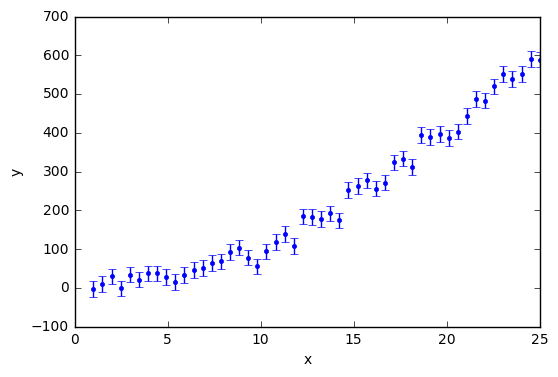

In [13]:
ui.plot_data()

For this simple fit we will use the Sherpa defaults. More advanced notebooks in this repository provide more realistic examples.

In [14]:
ui.fit()

Dataset               = 1
Method                = levmar
Statistic             = chi2
Initial fit statistic = 10533.8
Final fit statistic   = 42.0464 at function evaluation 30
Data points           = 50
Degrees of freedom    = 45
Probability [Q-value] = 0.597811
Reduced statistic     = 0.934364
Change in statistic   = 10491.7
   p1.c0          4.89942     
   p1.c1          3.92459     
   p1.c2          -0.0734699  
   p1.c3          0.0857304   
   p1.c4          -0.00205132 


We can plot the data along with the best fit model

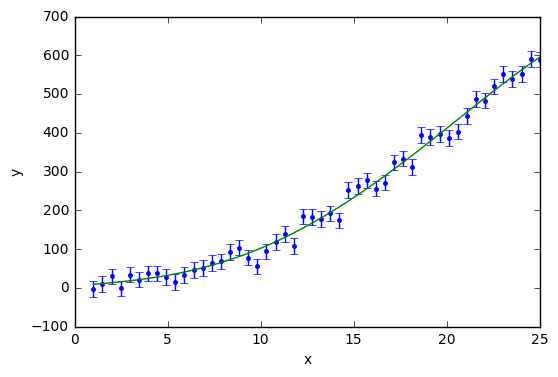

In [15]:
ui.plot_fit()

We can also plot the residuals. (The `plt.tight_layout()` simply makes sure the plot components are nicely spaced.)

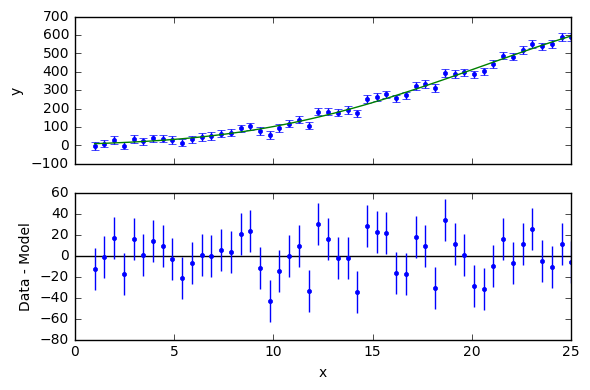

In [16]:
ui.plot_fit_resid()
plt.tight_layout()

One of the most important aspects of fitting is error analysis. Sherpa provides several methods, below we use a simple confidence levels calculation. The output shows the best fit parameter value along with the lower and upper bounds. You can read them as `<value> -<lower> +<upper>`, e.g. $5.26 \pm9.58$

In [17]:
ui.confidence()

p1.c0 lower bound:	-20.3964
p1.c0 upper bound:	20.3964
p1.c1 lower bound:	-10.1529
p1.c1 upper bound:	10.1529
p1.c2 lower bound:	-1.52571
p1.c3 lower bound:	-0.0869874
p1.c2 upper bound:	1.52571
p1.c4 lower bound:	-0.00166125
p1.c3 upper bound:	0.0869874
p1.c4 upper bound:	0.00166125
Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   p1.c0             4.89942     -20.3964      20.3964
   p1.c1             3.92459     -10.1529      10.1529
   p1.c2          -0.0734699     -1.52571      1.52571
   p1.c3           0.0857304   -0.0869874    0.0869874
   p1.c4         -0.00205132  -0.00166125   0.00166125


If you need more control over the plots, you can use matplotlib directly. Let's plot our data, using the `plt` module we imported above.

<Container object of 3 artists>

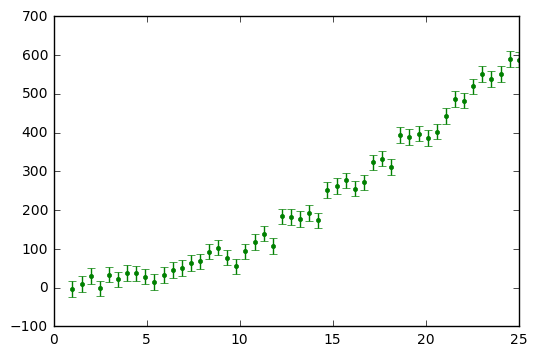

In [18]:
plt.errorbar(x, y, yerr=err, fmt='.', color='green')

Now let's plot the data along with the model

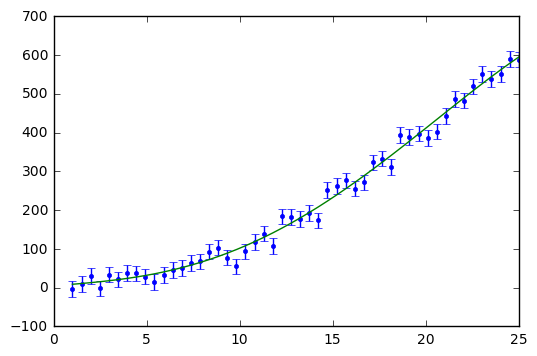

In [26]:
plt.errorbar(x, y, yerr=err, fmt='.', color='blue')
plt.plot(x, p1(x), color='green')

Plotting the residuals in the same plot it a little bit more complex:

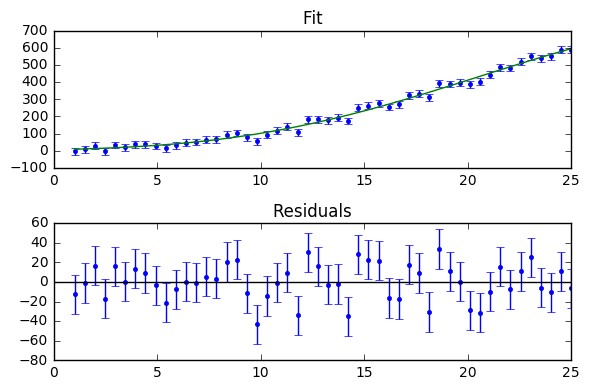

In [25]:
plt.subplot(2, 1, 1)
plt.errorbar(x, y, yerr=err, fmt='.', color='blue')
plt.plot(x, p1(x), color='green')
plt.title("Fit")

plt.subplot(2, 1, 2)
plt.errorbar(x, y - p1(x), yerr=err, fmt='.', color='blue')
plt.axhline(0, color='black')
plt.title("Residuals")

plt.tight_layout()

## Notebooks in this repository

### Introductory notebooks
  * [Really Simple Fit](really%20simple%20fit.ipynb)
  * [Simple Sherpa Fit](simple%20sherpa%20fit.ipynb)

### 2D fitting
  * [2D Simulated Image Fit with Astropy and MCMC](2D%20Simulated%20Image%20Fit%20with%20Astropy%20and%20MCMC.ipynb): This notebook is inspired by a similar one by Doug Burke, but designed as a worksheep for the 229th AAS meeting, and it uses a package that provides a bridge between Astropy and Sherpa.
  * [2D Simulated Image Fit with Sherpa UI and MCMC](2D%20Simulated%20Image%20Fit%20with%20Sherpa%20UI%20and%20MCMC.ipynb): This notebook carries out the same analysis as the previous one, this time using the Sherpa high level API.
  * [Simulating a 2D Image and a Bit of Error Analysis](simulating%20a%202D%20image%20and%20a%20bit%20of%20error%20analysis.ipynb): The original notebook by Doug Burke with 2D fitting examples.
  * <a href="simulating%20and%20fitting%20a%202D%20image%20(this%20time%20with%20a%20Bayesian%20approach).ipynb">Simulating and fitting a 2D image (this time with a Bayesian approach)</a>: same as above, using MCMC.
  
### Extending Sherpa
  * [User Model](user%20model.ipynb)
  * [And Integrated User Model](an%20integrated%20user%20model.ipynb)
  * <a href="extending%20existing%20models%20(and%20XSPEC).ipynb">Extending Existing Models (and XSPEC)</a>
 
### Plotting
  * [Plotting Using the Lower-Level Routines](plotting%20using%20the%20lower-level%20routines.ipynb)